This is an add-on script to the script entitled "Project_Script_Final" located in this same repository.  Comments here will be minimal, as I follow the same methodology outlined in that script, just with an alternative model approach here (using MLP Regressor instead of Random Forest).

In [18]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
print(sys.version) #I am running Python 3.6

3.6.0 | packaged by conda-forge | (default, Feb  9 2017, 14:54:13) [MSC v.1900 64 bit (AMD64)]


In [2]:
# import data
data = pd.read_csv('C:/Users/Austin/Desktop/OEAS895_Clayton/Project/Data/model_input.csv') #read in data
data.head()

,Date,Date_Julian,DMP_NoWater,Surface_Irradiance,Below_Ice_Irradiance,Surface_Temp_C,Lat,Lon,Hrs_Above_Frz_Ice_Since_Jun1,Cum_Surface_Irradiance_SinceJun1,Cum_SubSurface_Irradiance_SinceJun1,Source,Split
0,1-Jun,152,0.001,62300000.0,814000.0,1.689247,72.844081,-166.537644,0,2.070000e+09,84000000.0,Buoy7,Train
1,4-Jun,155,0.005,65000000.0,1840000.0,3.694515,73.037055,-166.767810,24,2.260000e+09,88300000.0,Buoy7,Test
2,5-Jun,156,0.013,64300000.0,1450000.0,4.947612,72.844835,-163.319440,60,2.460000e+09,45700000.0,Buoy8,Train
3,5-Jun,156,0.017,58700000.0,2520000.0,5.777930,73.055408,-166.908423,41,2.320000e+09,90800000.0,Buoy7,Train
4,10-Jun,161,0.020,133000000.0,349000.0,-1.576667,76.865833,-165.986000,0,6.020000e+09,4410000.0,SHEBA,Train


In [3]:
#define variables for machine learning
test=data[~data.Split.str.contains("Train")] #create test data
train=data[~data.Split.str.contains("Test")] #create train data

x_train=train[['Hrs_Above_Frz_Ice_Since_Jun1','Lat','Lon','Cum_Surface_Irradiance_SinceJun1']] #slight increase in r^2 (0.02)
x_test=test[['Hrs_Above_Frz_Ice_Since_Jun1','Lat','Lon','Cum_Surface_Irradiance_SinceJun1']]

#set target variable
y_train=train[['DMP_NoWater']]
y_test=test[['DMP_NoWater']]
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
y=data.DMP_NoWater

print(np.shape(x_test))
print(np.shape(x_train))
print(np.shape(y_test))
print(np.shape(y_train))

(8, 4)
(14, 4)
(8,)
(14,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Austin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [11]:
##Lets first re-explore the parameter space to decide on the best model architecture (hyperparameters)

from sklearn.neural_network import MLPRegressor
from sklearn import metrics

#build a nested loop to loop through both various numbers of layers and nodes
results = []
layers = []
scores_list=[]
count_layer = 1
for x in range(10,151,10):
    while count_layer <4:
        layers.append(x)
        model = MLPRegressor(hidden_layer_sizes=layers, max_iter=1000, random_state=1)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        scores = metrics.r2_score(y_test,y_pred)
        scores1 = metrics.mean_squared_error(y_test,y_pred)
        print(layers)
        print(scores, scores1)
        scores_list.append(metrics.r2_score(y_test,y_pred))
        count_layer=count_layer+1
    count_layer = 1
    layers=[]
#printed results show nodes (integer value), layers (number of integers- separated by commas) on top, r^2 (left) and MSE (right) on bottom

[10]
-2.4936407528872784 0.029725587757804643
[10, 10]
-0.6795871619048648 0.014290741123518138
[10, 10, 10]
-0.7605168068034869 0.014979329742612362
[20]
-0.30272669495767746 0.01108422972894279
[20, 20]
0.5063991140039421 0.004199795425983615
[20, 20, 20]
0.6013695667203387 0.0033917408129594787
[30]
0.10319839052018165 0.007630422481733887
[30, 30]
0.5567716930583428 0.003771201124170794
[30, 30, 30]
0.16894536142818672 0.007071015407059546
[40]
0.8838559421676191 0.0009882099013159098
[40, 40]
0.7954603824312769 0.0017403221401519552
[40, 40, 40]
0.7419067059210219 0.002195982759963265
[50]
0.7112974483724246 0.0024564211495458556
[50, 50]
0.6790851823376747 0.0027304987117858694
[50, 50, 50]
0.7501519996459454 0.0021258278071374682
[60]
0.31596898293336606 0.0058200672207268135
[60, 60]
0.783971516021297 0.0018380749804877325
[60, 60, 60]
0.7810656752622543 0.001862799281182285
[70]
0.9023011138002034 0.0008312694466858726
[70, 70]
0.9294119757897955 0.0006005971010546467
[70, 70,

In [15]:
#run classifier with high scoring model
#lets try 3 layers with 80 nodes each, as this model architecture achieved an r^2 of 0.93 in our loop above
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
mlp = MLPRegressor(hidden_layer_sizes=(80,80,80), max_iter=1000, random_state=1)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
# compute the R^2 and MSE
print(metrics.r2_score(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

0.9326179074891489
0.0005733194812833811


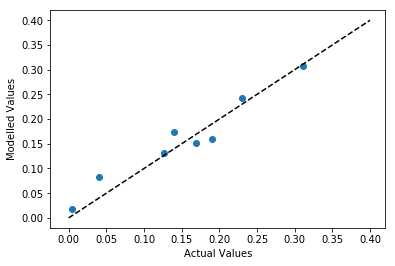

In [16]:
plt.scatter(y_test,y_pred)
b = np.linspace(0,0.4,8)
a = b
plt.plot(a,b,'--', color='k')
plt.xlabel('Actual Values')
plt.ylabel('Modelled Values')
plt.show()

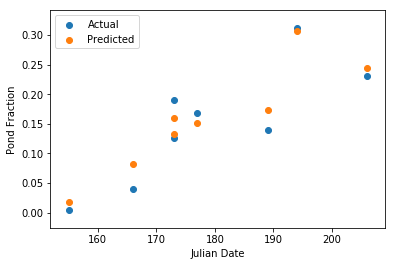

In [17]:
plt.scatter(test.Date_Julian,y_test)
plt.scatter(test.Date_Julian,y_pred)
plt.legend(['Actual','Predicted'], loc='upper left')
plt.xlabel('Julian Date')
plt.ylabel('Pond Fraction')
plt.show()

Overall good results!  Note the random state has been set to 1 here, as I was playing around with hyperparameters and wanted to keep the random state set.  Removing the random state will change the model accuracy, though most scores should still be >0.7.  The MLP regressor in general seems to perform better than the random forest when we manually choose our training and testing data.  However, the MLP regressor performs horribly in the leave one out method.  Choosing the appropriate model depends on the size of the data set, and the user's desired outcome.  If truly random machine learning is desired, especially if a larger data set of this nature becomes available, the Random Forest is a better approach.  With a small dataset such as this one, where we must tell the computer which values are train and test, the MLP Regressor seems to be the right choice.  Email me at aabbo005@odu.edu for further questions regarding these scripts.